In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import seaborn as sns
from scipy.stats import skew
%matplotlib inline

In [2]:
data=pd.read_csv("/kaggle/input/diabetes-dataset/diabetes.csv")

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#Checking null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
data.shape

(768, 9)

In [6]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Visualizing the data

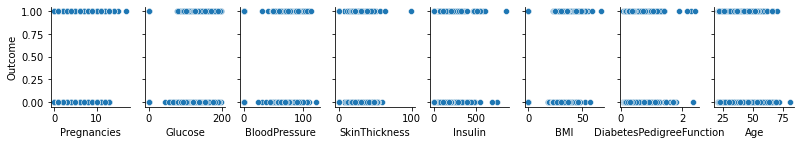

In [7]:
sns.pairplot(data, x_vars=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age'],y_vars='Outcome',kind="scatter",height=2,aspect=0.7)

In [8]:
#The above plot shows that attributes have squiggle relationship.

<AxesSubplot:>

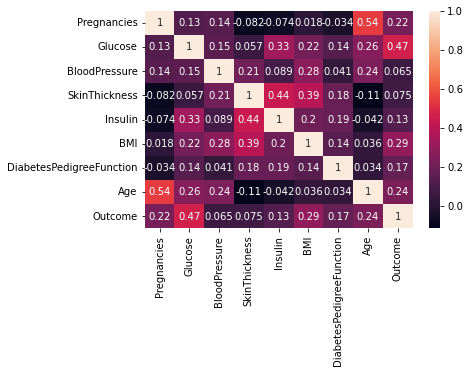

In [9]:
sns.heatmap(data.corr(),annot=True)


In [10]:
#From the above correlation plot its evident that increase in age & Preganancy are associated with diabetes

# Splitting the features and the target

In [11]:
X=data.drop("Outcome",axis=1)
Y=data["Outcome"]

In [12]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [13]:
Y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [14]:
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

# KNN classifier

In [15]:
model=KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,Y_train)

#Training data accuracy
XtrainPred=model.predict(X_train)
trainingDataAccuracy=accuracy_score(XtrainPred,Y_train)
print("Accuracy of the training data :",trainingDataAccuracy)

#Accuracy of test data
XtestPred=model.predict(X_test)
testDataAccuracy=accuracy_score(XtestPred,Y_test)
print("Accuracy of the test data is :",testDataAccuracy)

Accuracy of the training data : 0.8436482084690554
Accuracy of the test data is : 0.6818181818181818


In [18]:
bestK=0
bestAccuracy=-1
for k in range(1,21):
    model=KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train,Y_train)
    #Accuracy of test data
    XtestPred=model.predict(X_test)
    testDataAccuracy=accuracy_score(XtestPred,Y_test)
    if(testDataAccuracy>bestAccuracy):
        bestK=k
        bestAccuracy=testDataAccuracy
    print("Accuracy of the test data when K =",k,"is",testDataAccuracy)

Accuracy of the test data when K = 1 is 0.6753246753246753
Accuracy of the test data when K = 2 is 0.6883116883116883
Accuracy of the test data when K = 3 is 0.6818181818181818
Accuracy of the test data when K = 4 is 0.7337662337662337
Accuracy of the test data when K = 5 is 0.7272727272727273
Accuracy of the test data when K = 6 is 0.7597402597402597
Accuracy of the test data when K = 7 is 0.7532467532467533
Accuracy of the test data when K = 8 is 0.7467532467532467
Accuracy of the test data when K = 9 is 0.7467532467532467
Accuracy of the test data when K = 10 is 0.7402597402597403
Accuracy of the test data when K = 11 is 0.7337662337662337
Accuracy of the test data when K = 12 is 0.7272727272727273
Accuracy of the test data when K = 13 is 0.7272727272727273
Accuracy of the test data when K = 14 is 0.7272727272727273
Accuracy of the test data when K = 15 is 0.7272727272727273
Accuracy of the test data when K = 16 is 0.7467532467532467
Accuracy of the test data when K = 17 is 0.740259

In [20]:
print("The optimal K value is :",bestK)
print("The accuracy when K =",bestK,"is",bestAccuracy)

The optimal K value is : 6
The accuracy when K = 6 is 0.7597402597402597


# Building a User Interface to predict whether the patient as Diabetes or not

In [21]:
user_input=(0,179,50,36,159,37.8,0.455,22


)

#changing the user_input to numpy array
userInputArray=np.asarray(user_input)
#reshaping the numpy array
userInputReshaped=userInputArray.reshape(1,-1)
prediction=model.predict(userInputReshaped)
print(prediction)
if(prediction[0]==1):
  print("THIS PATIENT HAS DIABETES")
else:
    print("THIS PATIENT DOES NOT HAVE DIABETES")

[1]
THIS PATIENT HAS DIABETES


/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
